In [265]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
import re
from scipy.sparse import csr_matrix
from surprise import Reader,Dataset,SVD,evaluate

In [266]:
df1=pd.read_csv("/Users/y2z/Desktop/netflix-prize-data/combined_data_1.txt",header=None,names=['Cust_Id','Rating'],usecols=[0,1])
# df2=pd.read_csv("/Users/y2z/Desktop/netflix-prize-data/combined_data_2.txt")
# df3=pd.read_csv("/Users/y2z/Desktop/netflix-prize-data/combined_data_3.txt")
# df4=pd.read_csv("/Users/y2z/Desktop/netflix-prize-data/combined_data_4.txt")

In [267]:
df1['Rating']=df1['Rating'].astype(float)
# df=df1.append(df2)
# df=df.append(df3)
# df=df.append(df4)

In [502]:
print(df1.columns)
print(df1.shape)


Index(['Cust_Id', 'Rating'], dtype='object')
(24058263, 2)


In [503]:
df1.head()

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [504]:
df1.sample(5)

,Cust_Id,Rating
5114390,2383077,3.0
21829165,1683831,2.0
14337205,1583673,2.0
11733271,654189,3.0
860567,1592640,4.0


In [505]:
df1.describe(include='all')

,Cust_Id,Rating
count,24058263,2.405376e+07
unique,475257,NaN
top,305344,NaN
freq,4467,NaN
mean,NaN,3.599634e+00
std,NaN,1.086118e+00
min,NaN,1.000000e+00
25%,NaN,3.000000e+00
50%,NaN,4.000000e+00
75%,NaN,4.000000e+00


In [506]:
df=df1

In [507]:
df.index=np.arange(0,len(df))

In [508]:
df.head()

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [509]:
p=df.groupby('Rating',as_index=False).count().sort_values(by='Cust_Id',ascending=False)

In [510]:
p

,Rating,Cust_Id
3,4.0,8085741
2,3.0,6904181
4,5.0,5506583
1,2.0,2439073
0,1.0,1118186


In [511]:
movie_count=df.isnull().sum()[1]

In [512]:
movie_count

4499

In [513]:
cust_count=df['Cust_Id'].nunique()

In [514]:
cust_count

475257

In [515]:
rating_count=df['Rating'].count()

In [516]:
rating_count

24053764

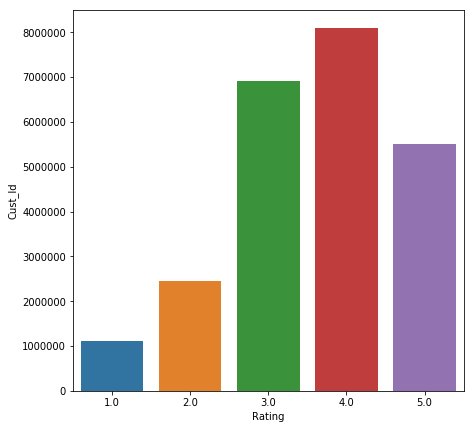

In [517]:
plt.figure(figsize=(7,7))
sns.barplot(x='Rating',y='Cust_Id',data=p)
plt.show()

In [518]:
df.sample()

,Cust_Id,Rating
17519451,2410011,3.0


In [519]:
torf=(pd.isnull(df.Rating).reset_index().groupby('Rating',as_index=False).count())

In [520]:
df_nan.head()

,index,Rating


In [521]:
movie_np

[]

In [522]:
movie_id

1

In [467]:
df=df[pd.notnull(df['Rating'])]

In [468]:
df['Movie_Id']=movie_np.astype(int)

AttributeError: 'list' object has no attribute 'astype'

In [ ]:
df['Cust_Id']=df['Cust_Id'].astype(int)

In [487]:
df.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [ ]:
# cust=pd.DataFrame(df[df['Cust_Id']==1488844])['Cust_Id'].count()

In [ ]:
# cust

In [ ]:
# cust_list=df.Cust_Id.unique().tolist()

In [ ]:
# for i in cust_list:
#     cust=pd.DataFrame(df[df['Cust_Id']==i])['Cust_Id'].count()
#     cust=cust>52
#     a=(i,cust)
#     print(a)
    
    

In [ ]:
# cust_list

In [ ]:
df_movie_summary=df.groupby('Movie_Id',as_index=False)['Rating'].agg(['count','mean'])

In [ ]:
df_movie_summary.head()

In [ ]:
df_movie_summary.index=df_movie_summary.index.map(int)

In [ ]:
movie_benchmark=round(df_movie_summary['count'].quantile(.7),0)
drop_movies=df_movie_summary[df_movie_summary['count']<movie_benchmark].index
print("Movies minimum times of review:",movie_benchmark)

In [ ]:
drop_movies

In [ ]:
df_cust_summary=df.groupby('Cust_Id',as_index=False)['Rating'].agg(['count','mean'])

In [ ]:
df_cust_summary.head()

In [ ]:
cust_benchmark=round(df_cust_summary['count'].quantile(.7),0)

In [ ]:
cust_benchmark

In [ ]:
drop_cust=df_cust_summary[df_cust_summary['count']<cust_benchmark].index

In [ ]:
drop_cust

In [ ]:
print("Customer minimum times of review:",cust_benchmark)

In [ ]:
df.head()

In [469]:
df=df[~df['Movie_Id'].isin(drop_movies)]
df=df[~df['Cust_Id'].isin(drop_cust)]

In [470]:
df.shape

(17337458, 3)

In [471]:
df

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
701,439011,1.0,3
703,1644750,3.0,3
704,2031561,4.0,3
705,616720,4.0,3
706,2467008,4.0,3


In [472]:
df_p=pd.pivot_table(df,values='Rating',index='Cust_Id',columns='Movie_Id')

In [473]:
df_p.shape

(143458, 1350)

In [474]:
df_title=pd.read_csv('/Users/y2z/Desktop/netflix-prize-data/movie_titles.csv',header=None,names=['Movie_Id','Year','Name'],encoding = "ISO-8859-1")

In [475]:
df_title.head()

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


In [476]:
df_title.set_index('Movie_Id',inplace=True)

In [477]:
df_title.head()

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW


In [478]:
df.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [479]:
df_title.shape

(17770, 2)

In [480]:
def recommend(movie_title,min_count):
    print("For movie:",movie_title)
    print("Top 10 movies recommended based on Pearsons'R correation-")
    i=int(df_title.index[df_title['Name']==movie_title][0])
    target=df_p[i]
    similar_to_target=df_p.corrwith(target)
    corr_target=pd.DataFrame(similar_to_target,columns=['PearsonR'])
    corr_target.dropna(inplace=True)
    corr_target=corr_target.sort_values(by='PearsonR',ascending=False)
    corr_target.index=corr_target.index.map(int)
    corr_target=corr_target.join(df_title).join(df_movie_summary)[['PearsonR','Name','count','mean']]
    print(corr_target[corr_target['count']>min_count][:10].to_string(index=False))

In [481]:
# similar_to_target=similar_to_target.reset_index().sort_values(by=0,ascending=False)

In [482]:
# similar_to_target.head()

In [483]:
# corr_target.head()

In [484]:
corr_target.head()

,PearsonR,Name,count,mean
Movie_Id,,,,
3124,1.000000,Titanic,4893,3.770284
4238,0.591161,Inu-Yasha,1883,4.554434
850,0.557643,Stoked: The Rise and Fall of Gator,2095,3.422912
1375,0.538104,Food of Love,1891,3.325225
1087,0.529259,Monkey Trouble,2166,3.068790


In [485]:
recommend("X2: X-Men United",0)

For movie: X2: X-Men United
Top 10 movies recommended based on Pearsons'R correation-
PearsonR                                               Name  count      mean
                                                                            
1.000000                                   X2: X-Men United  98720  3.932202
0.384550                           Batman Beyond: The Movie   2614  3.726855
0.375967                                     Justice League   3591  3.710944
0.361393                   Justice League: Justice on Trial   2961  3.718001
0.338025                 Batman Beyond: Return of the Joker   3704  3.604752
0.335256                                      Batman Begins  54922  4.236699
0.328229                       Batman: Mask of the Phantasm   2823  3.767977
0.327040  Batman: The Animated Series: Tales of the Dark...   2432  3.583059
0.316666                    Dragon Ball Z: Super Android 13   2426  3.428689
0.316166                           Mortal Kombat: The Movie   7633 